In [8]:
# libraries
import numpy as np
import pandas as pd
import pyreadr
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
perfomances_dt2 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/field_perfomances_dt.rds")[None] # also works for RData
percent20_dt = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/percent20_dt.rds")[None] # also works for RData
percent20_dt = percent20_dt[['NRT','policy']]
percent20_dt = percent20_dt[percent20_dt.NRT == 'static']

In [10]:
perfomances_dt2

,region,id_10,id_field,z,area_ha,Y_corn,Y_soy,L1,L2,L,n_deep_v5,N_fert,P,G,NRT,policy,policy_name,policy_val
0,1-South,884,1.0,1,40.0,6152.893270,3156.667255,8.113775,30.954334,39.068109,19.897739,210.0,714.405058,0.0,static,ratio_5,ratio,5
1,1-South,884,3.0,1,40.0,6173.831799,3161.446202,7.940364,30.441984,38.382348,19.773987,210.0,717.336452,0.0,static,ratio_5,ratio,5
2,1-South,885,1.0,1,40.0,7917.910129,3712.858707,6.477176,25.108051,31.585226,12.706269,210.0,961.507418,0.0,static,ratio_5,ratio,5
3,1-South,885,3.0,1,40.0,7964.909348,3693.823671,6.596965,23.264431,29.861396,11.362484,210.0,968.087309,0.0,static,ratio_5,ratio,5
4,1-South,971,1.0,1,40.0,8038.755618,3802.368338,5.221658,23.551640,28.773298,11.111127,210.0,978.425786,0.0,static,ratio_5,ratio,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12576715,1-South,1512,3.0,9,40.0,11122.820254,4406.088266,10.463996,15.804687,26.268683,28.112819,150.0,1452.194836,0.0,dynamic,red_30,red,30
12576716,1-South,1514,1.0,9,40.0,11685.373904,4335.206093,6.740974,11.488465,18.229439,18.786366,150.0,1530.952347,0.0,dynamic,red_30,red,30
12576717,1-South,1517,1.0,9,40.0,11428.950676,4179.838395,7.499177,10.937861,18.437038,8.228676,160.0,1488.053095,0.0,dynamic,red_30,red,30
12576718,1-South,1522,1.0,9,40.0,11638.808771,4080.096315,3.495745,9.040666,12.536411,8.667005,160.0,1517.433228,0.0,dynamic,red_30,red,30


In [11]:
#add the baselevel
# df = pd.DataFrame({'NRT': ['dynamic'],
#                    'policy': ['ratio_5']})
# percent20_dt = percent20_dt.append(df, ignore_index=True)

In [12]:
# #Filter the rows that are in the 20 percent
keys = list(percent20_dt.columns.values)
i1 = perfomances_dt2.set_index(keys).index
i2 = percent20_dt.set_index(keys).index
perfomances_opt_df = perfomances_dt2[i1.isin(i2)].reset_index()

# #Rename the base-level
perfomances_opt_df.loc[perfomances_opt_df.policy == "ratio_5","policy"]= "nopolicy_0"
# Get the base-level  data and name it with a zero. This is to estimate the change or delta
baselevel_df = perfomances_dt2.loc[(perfomances_dt2.policy == "ratio_5")& (perfomances_dt2.NRT == "static"),['id_10', 'id_field', 'z', 'N_fert','L','P','Y_corn']]
baselevel_df = baselevel_df.rename(columns={"N_fert":"N_fert_0", "L": "L_0", "P": "P_0", "Y_corn":'Y_0'})

# # Merge it with the perfomances_opt_df
perfomances_opt_df = pd.merge(perfomances_opt_df, baselevel_df,  how='left', left_on=['id_10', 'id_field', 'z'], right_on = ['id_10', 'id_field', 'z'])

# Calculate the differences in P and L
perfomances_opt_df['P_diff'] = perfomances_opt_df['P'] - perfomances_opt_df['P_0']
perfomances_opt_df['L_diff'] = perfomances_opt_df['L'] - perfomances_opt_df['L_0']
perfomances_opt_df['Y_diff'] = perfomances_opt_df['Y_corn'] - perfomances_opt_df['Y_0']
perfomances_opt_df['net_balance'] = perfomances_opt_df['P'] + perfomances_opt_df['G']
perfomances_opt_df['policy_cost'] = perfomances_opt_df['net_balance'] - perfomances_opt_df['P_0'] 
perfomances_opt_df

,index,region,id_10,id_field,z,area_ha,Y_corn,Y_soy,L1,L2,...,policy_val,N_fert_0,L_0,P_0,Y_0,P_diff,L_diff,Y_diff,net_balance,policy_cost
0,38232,1-South,884,1.0,1,40.0,6060.080176,3162.566083,7.352805,26.873850,...,14,210.0,39.068109,714.405058,6152.893270,-218.793833,-4.841454,-92.813094,722.411225,8.006167
1,38233,1-South,884,3.0,1,40.0,6079.484019,3167.504488,7.203041,26.373323,...,14,210.0,38.382348,717.336452,6173.831799,-219.008689,-4.805984,-94.347780,725.127763,7.791311
2,38234,1-South,885,1.0,1,40.0,7734.676161,3721.177356,4.338495,20.583404,...,14,210.0,31.585226,961.507418,7917.910129,-231.452756,-6.663328,-183.233968,956.854663,-4.652756
3,38235,1-South,885,3.0,1,40.0,7744.188943,3708.572307,4.342802,18.082919,...,14,210.0,29.861396,968.087309,7964.909348,-236.700857,-7.435675,-220.720405,958.186452,-9.900857
4,38236,1-South,971,1.0,1,40.0,7879.346747,3819.768721,3.759993,18.573307,...,14,210.0,28.773298,978.425786,8038.755618,-228.117242,-6.439998,-159.408870,977.108545,-1.317242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302320,12506623,3-North,462,3.0,9,40.0,11856.076047,4870.911682,11.413214,14.143537,...,18.5,170.0,32.194135,1541.243309,11858.880778,20.607338,-6.637384,-2.804731,1561.850647,20.607338
302321,12506624,3-North,463,1.0,9,40.0,11667.948936,4846.187343,10.939042,10.491445,...,18.5,170.0,26.946997,1627.579444,12475.567454,-92.066593,-5.516511,-807.618519,1535.512851,-92.066593
302322,12506625,3-North,463,3.0,9,40.0,11726.986228,4846.511373,15.960693,10.184633,...,18.5,170.0,31.440042,1642.176726,12579.833760,-98.398654,-5.294716,-852.847532,1543.778072,-98.398654
302323,12506626,3-North,464,1.0,9,40.0,13817.464744,3488.031266,30.811492,17.451873,...,18.5,170.0,56.814672,1903.539412,14446.710084,-67.094348,-8.551307,-629.245340,1836.445064,-67.094348


In [17]:
#Average across z
# perfomances_opt_df2 = perfomances_opt_df.groupby(['policy', 'NRT', 'id_10', 'id_field'], as_index=False).mean()
perfomances_opt_df2 = perfomances_opt_df.groupby(['policy', 'NRT', 'region','id_10', 'id_field']).mean().reset_index().drop(['index'], axis=1)

# Split value columns 
perfomances_opt_df2['policy_name'] = perfomances_opt_df2["policy"].str.split("_", n = 1, expand = True)[0]  
perfomances_opt_df2['policy_val'] = perfomances_opt_df2["policy"].str.split("_", n = 1, expand = True)[1]  
perfomances_opt_df2 = perfomances_opt_df2[perfomances_opt_df2.L_0 < 200]

perfomances_opt_df2 = perfomances_opt_df2[perfomances_opt_df2.NRT == 'static']

perfomances_opt_df2

,policy,NRT,region,id_10,id_field,area_ha,Y_corn,Y_soy,L1,L2,...,L_0,P_0,Y_0,P_diff,L_diff,Y_diff,net_balance,policy_cost,policy_name,policy_val
0,bal_1.5,static,1-South,884,1.0,40.0,10212.389397,3810.133760,12.078094,14.329939,...,33.936366,1295.953673,10306.811950,-92.427963,-7.528333,-94.422553,1303.734516,7.780843,bal,1.5
1,bal_1.5,static,1-South,884,2.0,40.0,8701.446277,3639.298465,13.256508,11.871729,...,33.052177,1089.033596,8828.811401,-123.056462,-7.923940,-127.365123,1092.202479,3.168883,bal,1.5
2,bal_1.5,static,1-South,884,3.0,40.0,10225.675752,3815.700590,11.842676,14.000721,...,33.320232,1298.317449,10323.696062,-92.702459,-7.476835,-98.020310,1305.594605,7.277157,bal,1.5
3,bal_1.5,static,1-South,884,4.0,40.0,10072.759294,3759.093640,17.266667,14.266667,...,39.240000,1272.075950,10136.256784,-90.459844,-7.706667,-63.497490,1284.186301,12.110351,bal,1.5
4,bal_1.5,static,1-South,885,1.0,40.0,11143.403484,4238.518592,10.301167,11.229751,...,27.452709,1445.049147,11371.779623,-95.121472,-5.921790,-228.376139,1434.076488,-10.972659,bal,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20150,red_18.5,static,3-North,463,4.0,40.0,12322.666223,4506.719231,9.776710,8.769179,...,22.171222,1645.825653,12605.897522,-18.652382,-3.625333,-283.231299,1627.173271,-18.652382,red,18.5
20151,red_18.5,static,3-North,464,1.0,40.0,13645.154834,3544.315544,27.768667,29.396324,...,66.621543,1833.117704,13943.697883,-20.796027,-9.456553,-298.543049,1812.321677,-20.796027,red,18.5
20152,red_18.5,static,3-North,464,2.0,40.0,13020.211949,3747.855828,21.729384,19.768457,...,48.207565,1709.283062,13059.164729,15.546611,-6.709724,-38.952781,1724.829673,15.546611,red,18.5
20153,red_18.5,static,3-North,464,3.0,40.0,10770.432631,3520.417401,2.942205,5.728912,...,12.452486,1420.159235,10993.994533,-10.298666,-3.781370,-223.561902,1409.860568,-10.298666,red,18.5


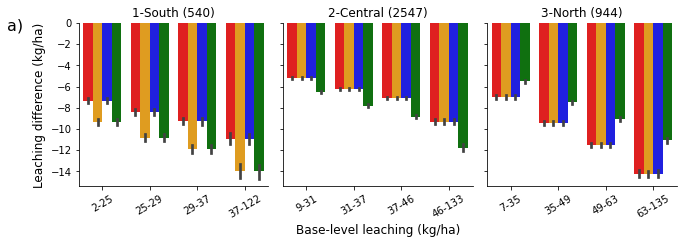

In [18]:
# BARCHART L change by base-level L 
perfomances_opt_df2['L_0_bin'] = perfomances_opt_df2.groupby(['region'])['L_0'].transform(
                     lambda x: pd.qcut(x, 4, labels=range(1,5)))

graph = sns.FacetGrid(perfomances_opt_df2, col ='region', 
                     sharex = False, sharey = True)

graph.map_dataframe(sns.barplot, x = "L_0_bin", y = "L_diff", hue = "policy_name", 
            palette=['red', 'orange', 'blue', 'green'], 
            hue_order = ['ratio', 'leach', 'bal', 'red'])

x_labels = perfomances_opt_df2.groupby(['region', 'L_0_bin'], as_index=False).agg(
    L_min=('L_0', 'min'), L_max=('L_0', 'max')).reset_index()

count_dt = perfomances_opt_df2[perfomances_opt_df2.policy == 'ratio_14'].groupby(['region'], as_index=False).agg(
    fields_count=('L_0','count')).reset_index()

axes = graph.axes.flatten()
for i, axes_n in enumerate(axes):
     #i=1
    region_n = ['1-South', '2-Central', '3-North'][i]
    x_labels_tmp1 = int(x_labels[x_labels.region == region_n].iloc[0,3])
    x_labels_tmp2 = x_labels[x_labels.region == region_n]['L_max'].values.astype(int)
    x_labels_tmp3 = [str(x_labels_tmp1)+'-'+ str(x_labels_tmp2[0]),  str(x_labels_tmp2[0])+'-'+ str(x_labels_tmp2[1]), str(x_labels_tmp2[1])+'-'+ str(x_labels_tmp2[2]), str(x_labels_tmp2[2])+'-'+ str(x_labels_tmp2[3])]
    axes_n.set_xticklabels(x_labels_tmp3, rotation=30) 
    axes_n.set_title(region_n +' ('+ str(count_dt['fields_count'].values[i]) + ')')
    
graph.axes[0,0].set_ylabel("Leaching difference (kg/ha)", size = 12)
graph.axes[0,1].set_xlabel('Base-level leaching (kg/ha)', size = 12) 

plt.gcf().text(-0.05, 0.85, 'a)', fontsize=16)

# plt.legend(ncol=2, bbox_to_anchor=(1, -0.4), loc='right')

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_a.png"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_a.pdf"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')

In [16]:
perfomances_opt_df2

,policy,NRT,region,id_10,id_field,area_ha,Y_corn,Y_soy,L1,L2,...,Y_0,P_diff,L_diff,Y_diff,net_balance,policy_cost,policy_name,policy_val,region_lab,L_0_bin
0,bal_1.5,static,1-South,884,1.0,40.0,10212.389397,3810.133760,12.078094,14.329939,...,10306.811950,-92.427963,-7.528333,-94.422553,1303.734516,7.780843,bal,1.5,NaN,3.0
1,bal_1.5,static,1-South,884,2.0,40.0,8701.446277,3639.298465,13.256508,11.871729,...,8828.811401,-123.056462,-7.923940,-127.365123,1092.202479,3.168883,bal,1.5,NaN,3.0
2,bal_1.5,static,1-South,884,3.0,40.0,10225.675752,3815.700590,11.842676,14.000721,...,10323.696062,-92.702459,-7.476835,-98.020310,1305.594605,7.277157,bal,1.5,NaN,3.0
3,bal_1.5,static,1-South,884,4.0,40.0,10072.759294,3759.093640,17.266667,14.266667,...,10136.256784,-90.459844,-7.706667,-63.497490,1284.186301,12.110351,bal,1.5,NaN,4.0
4,bal_1.5,static,1-South,885,1.0,40.0,11143.403484,4238.518592,10.301167,11.229751,...,11371.779623,-95.121472,-5.921790,-228.376139,1434.076488,-10.972659,bal,1.5,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20150,red_18.5,static,3-North,463,4.0,40.0,12322.666223,4506.719231,9.776710,8.769179,...,12605.897522,-18.652382,-3.625333,-283.231299,1627.173271,-18.652382,red,18.5,NaN,1.0
20151,red_18.5,static,3-North,464,1.0,40.0,13645.154834,3544.315544,27.768667,29.396324,...,13943.697883,-20.796027,-9.456553,-298.543049,1812.321677,-20.796027,red,18.5,NaN,4.0
20152,red_18.5,static,3-North,464,2.0,40.0,13020.211949,3747.855828,21.729384,19.768457,...,13059.164729,15.546611,-6.709724,-38.952781,1724.829673,15.546611,red,18.5,NaN,2.0
20153,red_18.5,static,3-North,464,3.0,40.0,10770.432631,3520.417401,2.942205,5.728912,...,10993.994533,-10.298666,-3.781370,-223.561902,1409.860568,-10.298666,red,18.5,NaN,1.0


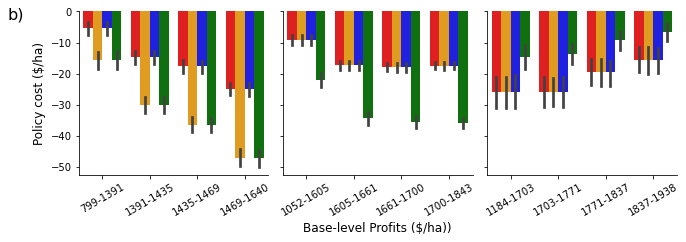

In [19]:
# BARCHART policy_cost by base-level P

perfomances_opt_df2['P_0_bin'] = perfomances_opt_df2.groupby(['region'])['P_0'].transform(
                     lambda x: pd.qcut(x, 4, labels=range(1,5)))

graph = sns.FacetGrid(perfomances_opt_df2, col ='region', 
                     sharex = False, sharey = True)

graph.map_dataframe(sns.barplot, x = "P_0_bin", y = "policy_cost", hue = "policy_name", 
            palette=['red', 'orange', 'blue', 'green'], 
            hue_order = ['ratio', 'leach', 'bal', 'red'])

x_labels = perfomances_opt_df2.groupby(['region', 'P_0_bin'], as_index=False).agg(
    P_min=('P_0', 'min'), P_max=('P_0', 'max')).reset_index()

count_dt = perfomances_opt_df2[perfomances_opt_df2.policy == 'ratio_14'].groupby(['region'], as_index=False).agg(
    fields_count=('P_0','count')).reset_index()

axes = graph.axes.flatten()
for i, axes_n in enumerate(axes):
    #i=1
    region_n = ['1-South', '2-Central', '3-North'][i]
    x_labels_tmp1 = int(x_labels[x_labels.region == region_n].iloc[0,3])
    x_labels_tmp2 = x_labels[x_labels.region == region_n]['P_max'].values.astype(int)
    x_labels_tmp3 = [str(x_labels_tmp1)+'-'+ str(x_labels_tmp2[0]),  str(x_labels_tmp2[0])+'-'+ str(x_labels_tmp2[1]), str(x_labels_tmp2[1])+'-'+ str(x_labels_tmp2[2]), str(x_labels_tmp2[2])+'-'+ str(x_labels_tmp2[3])]
    axes_n.set_xticklabels(x_labels_tmp3, rotation=30) 
    axes_n.set_title('')
    
graph.axes[0,0].set_ylabel("Policy cost ($/ha)", size = 12)
graph.axes[0,1].set_xlabel('Base-level Profits ($/ha))', size = 12)  

plt.gcf().text(-0.05, 0.85, 'b)', fontsize=16)
# plt.legend(ncol=2, bbox_to_anchor=(1, -0.4), loc='right')

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_b.png"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_b.pdf"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')

In [20]:
perfomances_opt_df2[perfomances_opt_df2.policy_name == 'ratio'].groupby(['policy', 'NRT', 'region','P_0_bin']).mean().reset_index()

,policy,NRT,region,P_0_bin,id_10,id_field,area_ha,Y_corn,Y_soy,L1,...,N_fert_0,L_0,P_0,Y_0,P_diff,L_diff,Y_diff,net_balance,policy_cost,L_0_bin
0,ratio_14,static,1-South,1.0,1256.022222,2.392593,40.0,10086.024256,3699.150921,19.206712,...,210.0,40.834841,1291.466257,10274.758978,-232.222861,-10.188538,-188.734722,1286.043396,-5.422861,3.007407
1,ratio_14,static,1-South,2.0,1197.911111,2.200000,40.0,10890.158740,3980.682496,12.448451,...,210.0,30.176379,1413.385871,11145.613363,-241.563647,-8.216600,-255.454622,1398.622224,-14.763647,2.348148
2,ratio_14,static,1-South,3.0,1222.622222,1.985185,40.0,11146.669107,4003.703233,12.132702,...,210.0,29.879742,1452.207584,11422.911317,-244.473909,-8.722257,-276.242210,1434.533675,-17.673909,2.266667
3,ratio_14,static,1-South,4.0,1265.155556,1.851852,40.0,11530.164659,4078.145583,12.400379,...,210.0,30.328053,1513.223909,11858.742211,-251.800857,-8.814660,-328.577552,1488.223052,-25.000857,2.377778
4,ratio_14,static,2-Central,1.0,675.686028,2.409733,40.0,11376.187168,4242.629191,18.445472,...,190.0,40.433941,1489.898590,11592.132786,-210.832387,-7.307169,-215.945618,1480.666204,-9.232387,2.199372
5,ratio_14,static,2-Central,2.0,770.293564,2.401884,40.0,12365.126811,4452.675408,18.387694,...,190.0,41.359476,1636.437250,12638.837500,-218.919497,-6.939219,-273.710689,1619.117754,-17.319497,2.687598
6,ratio_14,static,2-Central,3.0,731.773940,2.497645,40.0,12677.224056,4478.517097,18.174581,...,190.0,40.923988,1680.763582,12955.454158,-219.552214,-6.615558,-278.230102,1662.811368,-17.952214,2.594976
7,ratio_14,static,2-Central,4.0,576.621069,2.666667,40.0,13036.587368,4570.815058,17.471201,...,190.0,39.300194,1730.545850,13311.041783,-219.023618,-6.965351,-274.454415,1713.122232,-17.423618,2.515723
8,ratio_14,static,3-North,1.0,229.000000,2.271186,40.0,11843.728533,4121.449805,20.161598,...,170.0,48.573780,1592.956358,12228.259703,-189.634364,-9.983220,-384.531170,1567.121995,-25.834364,2.241525
9,ratio_14,static,3-North,2.0,212.656780,2.381356,40.0,12885.174829,4261.817303,20.369581,...,170.0,50.949399,1738.635507,13268.825049,-189.511031,-10.514730,-383.650220,1712.924476,-25.711031,2.508475


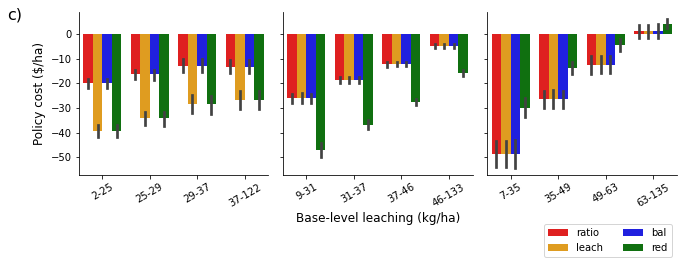

In [21]:
# BARCHART policy_cost by base-level L 
perfomances_opt_df2['L_0_bin'] = perfomances_opt_df2.groupby(['region'])['L_0'].transform(
                     lambda x: pd.qcut(x, 4, labels=range(1,5)))

graph = sns.FacetGrid(perfomances_opt_df2, col ='region', 
                     sharex = False, sharey = True)

graph.map_dataframe(sns.barplot, x = "L_0_bin", y = "policy_cost", hue = "policy_name", 
            palette=['red', 'orange', 'blue', 'green'], 
            hue_order = ['ratio', 'leach', 'bal', 'red'])

x_labels = perfomances_opt_df2.groupby(['region', 'L_0_bin'], as_index=False).agg(
    L_min=('L_0', 'min'), L_max=('L_0', 'max')).reset_index()

count_dt = perfomances_opt_df2[perfomances_opt_df2.policy == 'ratio_14'].groupby(['region'], as_index=False).agg(
    fields_count=('L_0','count')).reset_index()

axes = graph.axes.flatten()
for i, axes_n in enumerate(axes):
     #i=1
    region_n = ['1-South', '2-Central', '3-North'][i]
    x_labels_tmp1 = int(x_labels[x_labels.region == region_n].iloc[0,3])
    x_labels_tmp2 = x_labels[x_labels.region == region_n]['L_max'].values.astype(int)
    x_labels_tmp3 = [str(x_labels_tmp1)+'-'+ str(x_labels_tmp2[0]),  str(x_labels_tmp2[0])+'-'+ str(x_labels_tmp2[1]), str(x_labels_tmp2[1])+'-'+ str(x_labels_tmp2[2]), str(x_labels_tmp2[2])+'-'+ str(x_labels_tmp2[3])]
    axes_n.set_xticklabels(x_labels_tmp3, rotation=30) 
    axes_n.set_title('')
    
graph.axes[0,0].set_ylabel("Policy cost ($/ha)", size = 12)
graph.axes[0,1].set_xlabel('Base-level leaching (kg/ha)', size = 12) 

plt.gcf().text(-0.05, 0.85, 'c)', fontsize=16)

plt.legend(ncol=2, bbox_to_anchor=(1, -0.4), loc='right')
   

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_c.png"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_c.pdf"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')


In [ ]:
x_labels_tmp

In [ ]:
x_labels

In [ ]:
 
    
    
    
# iterate over axes of FacetGrid
for ax in graph.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%2 == 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=30) # set new labels
plt.show()


In [ ]:
hist = perfomances_opt_df2['L_0'].hist(bins=10)
# perfomances_opt_df2[['region', 'L_0']].groupby('region').quantile([0, .25, .5, 0.75, 1])

perfomances_opt_df2['L_0_bin'] = perfomances_opt_df2.groupby(['region'])['L_0'].transform(
                     lambda x: pd.qcut(x, 4, labels=range(1,5)))

bar_dt = perfomances_opt_df2.groupby(['policy_name', 'NRT', 'region', 'L_0_bin'], 
                                                                     as_index=False).agg(
    L_diff_mean=('L_diff', 'mean'),
    L_diff_std=('L_diff', 'std'),
    L_diff_count=('L_diff', 'count')).reset_index()


#bar_dt = bar_dt[bar_dt.region == '1']

bar_dt

In [ ]:
sns.barplot(data = bar_dt, x = "L_0_bin", y = "L_diff_mean", hue = "policy_name", 
            palette=['red', 'orange', 'blue', 'green'], 
            hue_order = ['ratio', 'leach', 'bal', 'red'])

In [ ]:
graph = sns.FacetGrid(bar_dt, col ='region')

# map the above form facetgrid with some attributes 

graph.map_dataframe(sns.barplot, x = "L_0_bin", y = "L_diff_mean", hue = "policy_name", 
            palette=['red', 'orange', 'blue', 'green'], 
            hue_order = ['ratio', 'leach', 'bal', 'red'])

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Leaching difference (kg/ha)", size = 12)

In [ ]:
# BARCHART L change by base-level L 
cut_bins = [0, 25, 50, 70, 160]
perfomances_opt_df2['L_0_bin'] = pd.cut(perfomances_opt_df2['L_0'], bins=cut_bins)
perfomances_opt_df2

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NRT == 'static'].groupby(['policy_name', 'NRT', 'L_0_bin'], 
                                                                     as_index=False).agg(
                      {'L_diff':['mean','std', 'count']}).reset_index()

In [ ]:
perfomances_opt_df2['L_0'].quantile([.1, .5])
perfomances_opt_df2.groupby('key').quantile()

In [ ]:
# BARCHART L change by base-level L 
cut_bins = [0, 25, 50, 70, 160]
perfomances_opt_df2['L_0_bin'] = pd.cut(perfomances_opt_df2['L_0'], bins=cut_bins)
perfomances_opt_df2

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NRT == 'static'].groupby(['policy_name', 'NRT', 'L_0_bin'], 
                                                                     as_index=False).agg(
                      {'L_diff':['mean','std', 'count']}).reset_index()

bar_ratio_dt = bar_dt[(bar_dt['policy_name'] == 'ratio') ]
bar_leach_dt = bar_dt[(bar_dt['policy_name'] == 'leach')]
bar_nred_dt = bar_dt[(bar_dt['policy_name'] == 'red')]
bar_bal_dt = bar_dt[(bar_dt['policy_name'] == 'bal')]
bar_nopolicy_dt = bar_dt[(bar_dt['policy_name'] == 'nopolicy')]

fig, ax = plt.subplots()

pos1 = [0,6,12,18]
pos2 = [x + 1 for x in pos1] 
pos3 = [x + 2 for x in pos1]
pos4 = [x + 3 for x in pos1]
pos5 = [x + 4 for x in pos1]

# ax.bar(x = pos1, height = bar_nopolicy_dt['L_diff']['mean'],color = 'c', label = 'nopolicy_static',
#       yerr=bar_nopolicy_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos1, height = bar_ratio_dt['L_diff']['mean'],color = 'r',label = 'ratio_static',
      yerr=bar_ratio_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_leach_dt['L_diff']['mean'],color = 'y',label = 'leach_static',
      yerr=bar_leach_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_bal_dt['L_diff']['mean'],color = 'b',label = 'balance_static',
      yerr=bar_nred_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos4, height = bar_nred_dt['L_diff']['mean'],color = 'g',label = 'reduction_static',
      yerr = bar_nred_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)
# yerr = [tuple(bar_nred_dt['L_diff']['std'].values), (0,0,0,0)]
#ax.errorbar(pos4, bar_nred_dt['L_diff']['mean'], yerr=[tuple(bar_nred_dt['L_diff']['std'].values), (0,0,0,0)], fmt='-o')

count_dt = bar_dt[bar_dt.policy_name == 'bal'].reset_index()
   
for counter, value in enumerate(pos2):    
    ax.annotate('['+str(count_dt.L_diff['count'][counter])+']', xy=(value, -22), xycoords='data', textcoords='data')      
ax.set_ylim(bottom= -23)   

plt.gcf().text(0, 0.85, 'a)', fontsize=16)
plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Leaching difference (kg/ha)", size = 12)

x_labels = [str(cut_bins[0])+'-'+ str(cut_bins[1]), str(cut_bins[1])+'-'+ str(cut_bins[2]), str(cut_bins[2])+'-'+ str(cut_bins[3]), str(cut_bins[3])+'-'+ str(cut_bins[4])]
plt.xticks(pos3, x_labels)

plt.legend(ncol=2, bbox_to_anchor=(1.03, -0.3), loc='right')

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_a.png"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_a.pdf"
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')

In [ ]:
pos3

In [ ]:
hist = perfomances_opt_df2['P_0'].hist(bins=5)

In [ ]:
perfomances_opt_df2

In [ ]:
# BARCHART P_diff change by base-level L

# red_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
# red_bins = [0, 70000, 100000, 130000, 200000]
# df['red_ex1'] = pd.red(df['ext price'], bins=red_bins, labels=red_labels_4)
cut_bins = [1200, 1500, 1650,1750, 2000]

perfomances_opt_df2['P_0_bin'] = pd.cut(perfomances_opt_df2['P_0'], bins=cut_bins)

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NRT == 'static'].groupby(['policy_name', 'NRT', 'P_0_bin'], 
                                                                     as_index=False).agg(
                      {'policy_cost':['mean','std', 'count']}).reset_index()
bar_dt

bar_ratio_dt = bar_dt[(bar_dt['policy_name'] == 'ratio') ]
bar_leach_dt = bar_dt[(bar_dt['policy_name'] == 'leach')]
bar_nred_dt = bar_dt[(bar_dt['policy_name'] == 'red')]
bar_bal_dt = bar_dt[(bar_dt['policy_name'] == 'bal')]
bar_nopolicy_dt = bar_dt[(bar_dt['policy_name'] == 'nopolicy')]

fig, ax = plt.subplots()

pos1 = [0,6,12,18]
pos2 = [x + 1 for x in pos1] 
pos3 = [x + 2 for x in pos1]
pos4 = [x + 3 for x in pos1]
pos5 = [x + 4 for x in pos1]

# ax.bar(x = pos1, height = bar_nopolicy_dt['policy_cost']['mean'],color = 'c', label = 'nopolicy_static',
#       yerr=bar_nopolicy_dt['policy_cost']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos1, height = bar_ratio_dt['policy_cost']['mean'],color = 'r', label = 'ratio_static',
      yerr=bar_ratio_dt['policy_cost']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_leach_dt['policy_cost']['mean'],color = 'y', label = 'leach_static',
      yerr=bar_leach_dt['policy_cost']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_bal_dt['policy_cost']['mean'],color = 'b', label = 'balance_static',
      yerr=bar_nred_dt['policy_cost']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos4, height = bar_nred_dt['policy_cost']['mean'],color = 'g', label = 'reduction_static',
      yerr=bar_nred_dt['policy_cost']['std'],align='center', alpha=1, ecolor='black', capsize=10)

count_dt = bar_dt[bar_dt.policy_name == 'bal'].reset_index()
for counter, value in enumerate(pos2):    
    ax.annotate('['+str(count_dt.policy_cost['count'][counter])+']', xy=(value, -103), xycoords='data', textcoords='data')    
ax.set_ylim(bottom= -108)   
    
# plt.legend(ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Profits ($/ha)", size = 12)
plt.ylabel("Policy cost ($/ha)", size = 12)
plt.gcf().text(0, 0.85, 'b)', fontsize=16)

x_labels = [str(cut_bins[0])+'-'+ str(cut_bins[1]), str(cut_bins[1])+'-'+ str(cut_bins[2]), str(cut_bins[2])+'-'+ str(cut_bins[3]), str(cut_bins[3])+'-'+ str(cut_bins[4])]
plt.xticks(pos3, x_labels)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_b.png"
plt.savefig(plot_file_name, dpi=300)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_b.pdf"
plt.savefig(plot_file_name, dpi=300)

In [ ]:
# BARCHART P_diff by base-level L 

# red_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
# red_bins = [0, 70000, 100000, 130000, 200000]
# df['red_ex1'] = pd.red(df['ext price'], bins=red_bins, labels=red_labels_4)
cut_bins = [0, 25, 50, 70, 160]

perfomances_opt_df2['L_0_bin'] = pd.cut(perfomances_opt_df2['L_0'], bins=cut_bins)

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NRT == 'static'].groupby(['policy_name', 'NRT', 'L_0_bin'], 
                                                                     as_index=False).agg(
                      {'P_diff':['mean','std', 'count']}).reset_index()
bar_dt
bar_ratio_dt = bar_dt[(bar_dt['policy_name'] == 'ratio') ]
bar_leach_dt = bar_dt[(bar_dt['policy_name'] == 'leach')]
bar_nred_dt = bar_dt[(bar_dt['policy_name'] == 'red')]
bar_bal_dt = bar_dt[(bar_dt['policy_name'] == 'bal') ]
# bar_nopolicy_dt = bar_dt[(bar_dt['policy_name'] == 'nopolicy')]

fig, ax = plt.subplots()

pos1 = [0,6,12,18]
pos2 = [x + 1 for x in pos1] 
pos3 = [x + 2 for x in pos1]
pos4 = [x + 3 for x in pos1]
pos5 = [x + 4 for x in pos1]

# ax.bar(x = pos1, height = bar_nopolicy_dt['P_diff']['mean'],color = 'c', label = 'nopolicy_static',
#       yerr=bar_nopolicy_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos1, height = bar_ratio_dt['P_diff']['mean'],color = 'r', label = 'ratio_static',
      yerr=bar_ratio_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_leach_dt['P_diff']['mean'],color = 'y', label = 'leach_static',
      yerr=bar_leach_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_bal_dt['P_diff']['mean'],color = 'b', label = 'balance_static',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos4, height = bar_nred_dt['P_diff']['mean'],color = 'g', label = 'reduction_static',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

count_dt = bar_dt[bar_dt.policy_name == 'bal'].reset_index()
count_dt = bar_dt[bar_dt.policy_name == 'bal'].reset_index()

for counter, value in enumerate(pos2):    
    ax.annotate('['+str(count_dt.P_diff['count'][counter])+']', xy=(value,35), xycoords='data', textcoords='data')   
ax.set_ylim(top=80)

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Profits difference (kg/ha)", size = 12)
plt.gcf().text(0, 0.85, 'a)', fontsize=16)
x_labels = [str(cut_bins[0])+'-'+ str(cut_bins[1]), str(cut_bins[1])+'-'+ str(cut_bins[2]), str(cut_bins[2])+'-'+ str(cut_bins[3]), str(cut_bins[3])+'-'+ str(cut_bins[4])]
plt.xticks(pos3, x_labels)
# plt.legend(ncol=2)
# plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_a.png"
# plt.savefig(plot_file_name, dpi=300)

# plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_a.pdf"
# plt.savefig(plot_file_name, dpi=300)

In [ ]:
# BARCHART P_diff change by base-level L

# red_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
# red_bins = [0, 70000, 100000, 130000, 200000]
# df['red_ex1'] = pd.red(df['ext price'], bins=red_bins, labels=red_labels_4)
cut_bins = [1200, 1500, 1650,1750, 2000]

perfomances_opt_df2['P_0_bin'] = pd.cut(perfomances_opt_df2['P_0'], bins=cut_bins)

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NRT == 'dynamic'].groupby(['policy_name', 'NRT', 'P_0_bin'], 
                                                                     as_index=False).agg(
                      {'P_diff':['mean','std', 'count']}).reset_index()
bar_dt

bar_ratio_dt = bar_dt[(bar_dt['policy_name'] == 'ratio') ]
bar_leach_dt = bar_dt[(bar_dt['policy_name'] == 'leach')]
bar_nred_dt = bar_dt[(bar_dt['policy_name'] == 'red')]
bar_bal_dt = bar_dt[(bar_dt['policy_name'] == 'bal')]
bar_nopolicy_dt = bar_dt[(bar_dt['policy_name'] == 'nopolicy')]

fig, ax = plt.subplots()

pos1 = [0,6,12,18]
pos2 = [x + 1 for x in pos1] 
pos3 = [x + 2 for x in pos1]
pos4 = [x + 3 for x in pos1]
pos5 = [x + 4 for x in pos1]

ax.bar(x = pos1, height = bar_nopolicy_dt['P_diff']['mean'],color = 'c', label = 'nopolicy_static',
      yerr=bar_nopolicy_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_ratio_dt['P_diff']['mean'],color = 'r', label = 'ratio_static',
      yerr=bar_ratio_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_leach_dt['P_diff']['mean'],color = 'y', label = 'leach_static',
      yerr=bar_leach_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos4, height = bar_bal_dt['P_diff']['mean'],color = 'b', label = 'balance_static',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos5, height = bar_nred_dt['P_diff']['mean'],color = 'g', label = 'reduction_dynamic',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

count_dt = bar_dt[bar_dt.policy_name == 'bal'].reset_index()
for counter, value in enumerate(pos2):    
    ax.annotate(count_dt.P_diff['count'][counter], xy=(value, 2), xycoords='data', textcoords='data')    

    
# plt.legend(ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Profits ($/ha)", size = 12)
plt.ylabel("Profits difference (kg/ha)", size = 12)
plt.gcf().text(0, 0.85, 'c)', fontsize=16)

x_labels = [str(cut_bins[0])+'-'+ str(cut_bins[1]), str(cut_bins[1])+'-'+ str(cut_bins[2]), str(cut_bins[2])+'-'+ str(cut_bins[3]), str(cut_bins[3])+'-'+ str(cut_bins[4])]
plt.xticks(pos3, x_labels)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_c.png"
plt.savefig(plot_file_name, dpi=300)

In [ ]:
# ratio_1_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'ratio') & (perfomances_dt5['NRT'] == '1')]
# leach_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'leach') & (perfomances_dt5['NRT'] == '1')]
# nred_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'nred') & (perfomances_dt5['NRT'] == '1')]
# subs_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'subs') & (perfomances_dt5['NRT'] == '1')]

ratio_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'ratio') & (perfomances_opt_df2['NRT'] == 'dynamic')]
leach_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'leach') & (perfomances_opt_df2['NRT'] == 'dynamic')]
nred_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'red') & (perfomances_opt_df2['NRT'] == 'dynamic')]
bal_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'bal') & (perfomances_opt_df2['NRT'] == 'dynamic')]
nopolicy_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'nopolicy') & (perfomances_opt_df2['NRT'] == 'dynamic')]

In [ ]:
# Profits change by base-level P
 
fig, ax = plt.subplots()
# ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NRT1')
# ax.plot(leach_1_dt['L_change'], leach_1_dt['C'], color = 'g', label = 'leach_NRT1')
# ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NRT1')
ax.scatter(ratio_2_dt['P_0'], ratio_2_dt['P_diff'], color = 'r',  label = 'dynamic-ratio', s = 10)
ax.scatter(leach_2_dt['P_0'], leach_2_dt['P_diff'], color = 'g', label = 'leach', s = 10)
ax.scatter(nred_2_dt['P_0'], nred_2_dt['P_diff'], color = 'b', label = 'reduction', s = 10)
ax.scatter(nopolicy_2_dt['P_0'], nopolicy_2_dt['P_diff'], color = 'y', label = 'dynamic-nopolicy', s = 10)
# ax.plot(subs_2_dt['L_change'], subs_2_dt['C'], color = 'y', label = 'subs_dynamic')

plt.legend()

plt.xlabel("Base-level Profits (kg/ha)", size = 12)
plt.ylabel("Profits difference ($/ha)", size = 12)
plt.gcf().text(0, 0.85, 'c)', fontsize=16)
# ax.set_xticks((np.arange(0, 21, 1)))

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_scatter_c.png"
plt.savefig(plot_file_name, dpi=300)

In [ ]:
leach_2_dt

In [ ]:
# Profits change by base-level L
 
fig, ax = plt.subplots()
# ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NRT1')
# ax.plot(leach_1_dt['L_change'], leach_1_dt['C'], color = 'g', label = 'leach_NRT1')
# ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NRT1')
ax.scatter(ratio_2_dt['L_0'], ratio_2_dt['P_diff'], color = 'r',  label = 'dynamic-ratio', s = 10)
ax.scatter(leach_2_dt['L_0'], leach_2_dt['P_diff'], color = 'g', label = 'dynamic-leach', s = 10)
ax.scatter(nred_2_dt['L_0'], nred_2_dt['P_diff'], color = 'b', label = 'dynamic-reduction', s = 10)
ax.scatter(nopolicy_2_dt['L_0'], nopolicy_2_dt['P_diff'], color = 'y', label = 'nopolicy_dynamic', s = 10)
# ax.plot(subs_2_dt['L_change'], subs_2_dt['C'], color = 'y', label = 'subs_NRT2')

plt.legend()

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Profits difference ($/ha)", size = 12)
plt.gcf().text(0, 0.85, 'a)', fontsize=16)
# ax.set_xticks((np.arange(0, 21, 1)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_scatter_a.png"
plt.savefig(plot_file_name, dpi=300)

In [ ]:
# L change by base-level L
 
fig, ax = plt.subplots()
# ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NRT1')
# ax.plot(leach_1_dt['L_change'], leach_1_dt['C'], color = 'g', label = 'leach_NRT1')
# ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NRT1')
ax.scatter(ratio_2_dt['L_0'], ratio_2_dt['L_diff'], color = 'r',  label = 'dynamic-ratio', s = 10)
ax.scatter(leach_2_dt['L_0'], leach_2_dt['L_diff'], color = 'g', label = 'dynamic-leach', s = 10)
ax.scatter(nred_2_dt['L_0'], nred_2_dt['L_diff'], color = 'b', label = 'dynamic-reduction', s = 10)
ax.scatter(nopolicy_2_dt['L_0'], nopolicy_2_dt['L_diff'], color = 'y', label = 'dynamic-nopolicy', s = 10)
plt.legend()

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Leaching difference (kg/ha)", size = 12)
plt.gcf().text(0, 0.85, 'b)', fontsize=16)
# ax.set_xticks((np.arange(0, 21, 1)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_scatter_b.png"
plt.savefig(plot_file_name, dpi=300)

In [ ]:
perfomances_opt_df2

In [ ]:
import seaborn as sns

sns.distplot(nopolicy_2_dt['P_diff'], hist = False, kde = True,color = 'y', kde_kws = {'linewidth': 3}, label = 'nopolicy_dynamic')
sns.distplot(ratio_2_dt['P_diff'], hist = False, kde = True,color = 'r', kde_kws = {'linewidth': 3}, label = 'dynamic-ratio')
sns.distplot(leach_2_dt['P_diff'], hist = False, kde = True,color = 'g', kde_kws = {'linewidth': 3}, label = 'dynamic-leach')
sns.distplot(bal_2_dt['P_diff'], hist = False, kde = True,color = 'c', kde_kws = {'linewidth': 3}, label = 'dynamic-bal')
sns.distplot(nred_2_dt['P_diff'], hist = False, kde = True,color = 'b', kde_kws = {'linewidth': 3}, label = 'dynamic-reduction')

# Plot formatting
plt.legend(prop={'size': 16})
# plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Profits difference ($/ha)')
plt.ylabel('Density')

In [ ]:
perfomances_opt_df[perfomances_opt_df.NRT == '1']

In [ ]:
ratio_2_dt = perfomances_dt2[(perfomances_dt2.policy == 'ratio_11') & (perfomances_dt2.NRT == '2')]

ratio_2_dt

In [ ]:
pd.melt(ratio_2_dt, id_vars=['policy', 'id_10', 'id_field', 'z','NRT'], value_vars=['Y_corn', 'Y_soy', , 'L1' ,'L2',
                                                                                    'N_fert', 'P', 'G'])